# Proyek Analisis Data: E-Commerce Public Dataset 
- **Nama:** Mochamad Nurul Huda
- **Email:** mochamadnurulhuda16@gmail.com
- **ID Dicoding:** huda16

## Menentukan Pertanyaan Bisnis

1. Bagaimana distribusi metode pembayaran yang digunakan oleh pelanggan?
2. Apa faktor-faktor yang mempengaruhi kepuasan pelanggan berdasarkan skor ulasan?
3. Bagaimana hubungan antara kategori produk dan nilai penjualan?
4. Bagaimana distribusi pelanggan berdasarkan lokasi geografis?

## Import Semua Packages/Library yang Digunakan

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats
import seaborn as sns

## Data Wrangling

### Gathering Data

In [117]:
customers_df = pd.read_csv("./data/customers_data.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [118]:
geolocation_df = pd.read_csv("./data/geolocation_data.csv")
geolocation_df.head()

,geolocation_df_zip_code_prefix,geolocation_df_lat,geolocation_df_lng,geolocation_df_city,geolocation_df_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [119]:
items_df = pd.read_csv("./data/order_items_data.csv")
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [120]:
payments_df = pd.read_csv("./data/order_payments_data.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [121]:
reviews_df = pd.read_csv("./data/order_reviews_data.csv")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [122]:
orders_df = pd.read_csv("./data/orders_data.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [123]:
category_df = pd.read_csv("./data/product_category_name_translation.csv")
category_df.head()

,product_category_df_name,product_category_df_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [124]:
products_df = pd.read_csv("./data/products_data.csv")
products_df.head()

,product_id,product_category_df_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [125]:

sellers_df = pd.read_csv("./data/sellers_data.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [126]:
# Distribusi Kategori Produk
category_df_distribution = products_df['product_category_df_name'].value_counts()
print("Distribusi Kategori Produk:")
print(category_df_distribution)

# Distribusi Pelanggan Berdasarkan Kota
customer_city_distribution = customers_df['customer_city'].value_counts().head(10)
print("\nDistribusi Pelanggan Berdasarkan Kota (Top 10):")
print(customer_city_distribution)

# Distribusi Penjual Berdasarkan Negara Bagian
seller_state_distribution = sellers_df['seller_state'].value_counts()
print("\nDistribusi Penjual Berdasarkan Negara Bagian:")
print(seller_state_distribution)

# Distribusi Skor Ulasan
review_score_distribution = reviews_df['review_score'].value_counts()
print("\nDistribusi Skor Ulasan:")
print(review_score_distribution)

Distribusi Kategori Produk:
product_category_df_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

Distribusi Pelanggan Berdasarkan Kota (Top 10):
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64

Distribusi Penjual Berdasarkan Negara Bagian:
seller_state
SP    1849
PR     349
MG     244

**Insight:**
1. **Distribusi Kategori Produk:**
    - Kategori produk dengan jumlah terbanyak adalah `cama_mesa_banho` dengan 3029 produk, diikuti oleh `esporte_lazer` dengan 2867 produk, dan `moveis_decoracao` dengan 2657 produk.
    - Kategori dengan jumlah produk paling sedikit adalah `cds_dvds_musicais` dengan hanya 1 produk, diikuti oleh `seguros_e_servicos` dengan 2 produk, dan `pc_gamer` dengan 3 produk.

2. **Distribusi Pelanggan Berdasarkan Kota:**
    - Kota dengan jumlah pelanggan terbanyak adalah `sao paulo` dengan 15540 pelanggan, diikuti oleh `rio de janeiro` dengan 6882 pelanggan, dan `belo horizonte` dengan 2773 pelanggan.
    - Kota dengan jumlah pelanggan paling sedikit di antara 10 besar adalah `sao bernardo do campo` dengan 938 pelanggan.

3. **Distribusi Penjual Berdasarkan Negara Bagian:**
    - Negara bagian dengan jumlah penjual terbanyak adalah `SP` (São Paulo) dengan 1849 penjual, diikuti oleh `PR` (Paraná) dengan 349 penjual, dan `MG` (Minas Gerais) dengan 244 penjual.
    - Negara bagian dengan jumlah penjual paling sedikit adalah `PA` (Pará), `AM` (Amazonas), `MA` (Maranhão), `AC` (Acre), dan `PI` (Piauí) masing-masing dengan 1 penjual.

4. **Distribusi Skor Ulasan:**
    - Skor ulasan terbanyak adalah 5 dengan 57328 ulasan, diikuti oleh skor 4 dengan 19142 ulasan, dan skor 1 dengan 11424 ulasan.
    - Skor ulasan paling sedikit adalah 2 dengan 3151 ulasan.

### Assessing Data

#### Menilai tabel `customers_df`

In [127]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [128]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [129]:
customers_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [130]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [131]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel `geolocation_df`

In [132]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   geolocation_df_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_df_lat              1000163 non-null  float64
 2   geolocation_df_lng              1000163 non-null  float64
 3   geolocation_df_city             1000163 non-null  object 
 4   geolocation_df_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [133]:
geolocation_df.isna().sum()

geolocation_df_zip_code_prefix    0
geolocation_df_lat                0
geolocation_df_lng                0
geolocation_df_city               0
geolocation_df_state              0
dtype: int64

In [134]:
geolocation_df.nunique()

geolocation_df_zip_code_prefix     19015
geolocation_df_lat                717360
geolocation_df_lng                717613
geolocation_df_city                 8011
geolocation_df_state                  27
dtype: int64

In [135]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [136]:
geolocation_df.describe()

,geolocation_df_zip_code_prefix,geolocation_df_lat,geolocation_df_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Menilai tabel `items_df`

In [137]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [138]:
items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [139]:
items_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [140]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [141]:
items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel `payments_df`

In [142]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [143]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [144]:
payments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [145]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [146]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai tabel `reviews_df`

In [147]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [148]:
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [149]:
reviews_df.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [150]:
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [151]:
reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai tabel `orders_df`

In [152]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [153]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [154]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [155]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [156]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel `category_df`

In [157]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   product_category_df_name          71 non-null     object
 1   product_category_df_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [158]:
category_df.isna().sum()

product_category_df_name            0
product_category_df_name_english    0
dtype: int64

In [159]:
category_df.nunique()

product_category_df_name            71
product_category_df_name_english    71
dtype: int64

In [160]:
print("Jumlah duplikasi: ", category_df.duplicated().sum())

Jumlah duplikasi:  0


In [161]:
category_df.describe()

,product_category_df_name,product_category_df_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai tabel `products_df`

In [162]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_df_name    32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [163]:
products_df.isna().sum()

product_id                      0
product_category_df_name      610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [164]:
products_df.nunique()

product_id                    32951
product_category_df_name         73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [165]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [166]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel `sellers_df`

In [167]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [168]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [169]:
sellers_df.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

In [170]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [171]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
1. **Tabel `customers`:**
    - Tidak ada nilai yang hilang pada tabel `customers`.
    - Terdapat 99441 entri unik pada tabel ini.
    - Tidak ada duplikasi data pada tabel `customers`.
    - Kolom `customer_zip_code_prefix` memiliki tipe data `int64`, sedangkan kolom lainnya memiliki tipe data `object`.

2. **Tabel `geolocation`:**
    - Tidak ada nilai yang hilang pada tabel `geolocation`.
    - Terdapat 1000163 entri unik pada tabel ini.
    - Tidak ada duplikasi data pada tabel `geolocation`.
    - Kolom `geolocation_lat` dan `geolocation_lng` memiliki tipe data `float64`, sedangkan kolom lainnya memiliki tipe data `int64` dan `object`.

3. **Tabel `items`:**
    - Tidak ada nilai yang hilang pada tabel `items`.
    - Terdapat 112650 entri unik pada tabel ini.
    - Tidak ada duplikasi data pada tabel `items`.
    - Kolom `price` dan `freight_value` memiliki tipe data `float64`, kolom `order_item_id` memiliki tipe data `int64`, sedangkan kolom lainnya memiliki tipe data `object`.

4. **Tabel `payments`:**
    - Tidak ada nilai yang hilang pada tabel `payments`.
    - Terdapat 103886 entri unik pada tabel ini.
    - Tidak ada duplikasi data pada tabel `payments`.
    - Kolom `payment_value` memiliki tipe data `float64`, kolom `payment_sequential` dan `payment_installments` memiliki tipe data `int64`, sedangkan kolom lainnya memiliki tipe data `object`.

5. **Tabel `reviews`:**
    - Terdapat beberapa nilai yang hilang pada kolom `review_comment_title` dan `review_comment_message`.
    - Terdapat 99224 entri unik pada tabel ini.
    - Tidak ada duplikasi data pada tabel `reviews`.
    - Kolom `review_score` memiliki tipe data `int64`, sedangkan kolom lainnya memiliki tipe data `object`.

6. **Tabel `orders`:**
    - Terdapat beberapa nilai yang hilang pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`.
    - Terdapat 99441 entri unik pada tabel ini.
    - Tidak ada duplikasi data pada tabel `orders`.
    - Semua kolom pada tabel ini memiliki tipe data `object`.

7. **Tabel `category`:**
    - Tidak ada nilai yang hilang pada tabel `category`.
    - Terdapat 71 entri unik pada tabel ini.
    - Tidak ada duplikasi data pada tabel `category`.
    - Semua kolom pada tabel ini memiliki tipe data `object`.

8. **Tabel `products`:**
    - Terdapat beberapa nilai yang hilang pada kolom `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm`.
    - Terdapat 32951 entri unik pada tabel ini.
    - Tidak ada duplikasi data pada tabel `products`.
    - Kolom `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`, `product_name_lenght`, `product_description_lenght`, dan `product_photos_qty` memiliki tipe data `float64`, sedangkan kolom lainnya memiliki tipe data `object`.

9. **Tabel `sellers`:**
    - Tidak ada nilai yang hilang pada tabel `sellers`.
    - Terdapat 3095 entri unik pada tabel ini.
    - Tidak ada duplikasi data pada tabel `sellers`.
    - Kolom `seller_zip_code_prefix` memiliki tipe data `int64`, sedangkan kolom lainnya memiliki tipe data `object`.

### Cleaning Data

##### Duplicate data

In [172]:
# Menghapus duplikasi dari DataFrame customers_df
customers_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

# Menghapus duplikasi dari DataFrame geolocation_df
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

# Menghapus duplikasi dari DataFrame items_df
items_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", items_df.duplicated().sum())

# Menghapus duplikasi dari DataFrame payments_df
payments_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

# Menghapus duplikasi dari DataFrame reviews_df
reviews_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())

# Menghapus duplikasi dari DataFrame orders_df
orders_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

# Menghapus duplikasi dari DataFrame category_df
category_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", category_df.duplicated().sum())

# Menghapus duplikasi dari DataFrame products_df
products_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", products_df.duplicated().sum())

# Menghapus duplikasi dari DataFrame sellers_df
sellers_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0
Jumlah duplikasi:  0


##### Missing Value

In [173]:
# Menangani nilai yang hilang dalam DataFrame 'products_df'
products_df['product_category_df_name'].fillna('unknown', inplace=True)
products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mean(), inplace=True)
products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].mean(), inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mean(), inplace=True)
products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean(), inplace=True)
products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean(), inplace=True)
products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean(), inplace=True)
products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean(), inplace=True)

# Menangani nilai yang hilang dalam DataFrame 'orders_df'
orders_df['order_approved_at'].fillna(method='ffill', inplace=True)
orders_df['order_delivered_carrier_date'].fillna(method='ffill', inplace=True)
orders_df['order_delivered_customer_date'].fillna(method='ffill', inplace=True)

# Menangani nilai yang hilang dalam DataFrame 'reviews_df'
reviews_df['review_comment_title'].fillna('No Title', inplace=True)
reviews_df['review_comment_message'].fillna('No Comment', inplace=True)

# Memverifikasi bahwa tidak ada nilai yang hilang
print(products_df.isna().sum())
print(orders_df.isna().sum())
print(reviews_df.isna().sum())

product_id                    0
product_category_df_name      0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


C:\Users\Mochamad Nurul Huda\AppData\Local\Temp\ipykernel_12984\392993706.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_df_name'].fillna('unknown', inplace=True)
C:\Users\Mochamad Nurul Huda\AppData\Local\Temp\ipykernel_12984\392993706.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

##### Inaccurate Value

In [174]:
# Menangani nilai yang tidak akurat dalam DataFrame 'products_df'
# Menghapus outlier pada 'product_weight_g'
products_df = products_df[products_df['product_weight_g'] < products_df['product_weight_g'].quantile(0.99)]

# Menghapus outlier pada 'product_length_cm', 'product_height_cm', dan 'product_width_cm'
products_df = products_df[products_df['product_length_cm'] < products_df['product_length_cm'].quantile(0.99)]
products_df = products_df[products_df['product_height_cm'] < products_df['product_height_cm'].quantile(0.99)]
products_df = products_df[products_df['product_width_cm'] < products_df['product_width_cm'].quantile(0.99)]

# Mengoreksi tipe data jika diperlukan
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# Memverifikasi bahwa tidak ada nilai yang tidak akurat yang tersisa
print(products_df.describe())
print(orders_df.info())


       product_name_lenght  product_description_lenght  product_photos_qty  \
count         31592.000000                31592.000000        31592.000000   
mean             48.429724                  767.406138            2.177452   
std              10.147889                  629.168854            1.716164   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  341.000000            1.000000   
50%              51.000000                  600.000000            1.000000   
75%              57.000000                  951.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      31592.000000       31592.000000       31592.000000   
mean        1827.888609          29.372519          15.911429   
std         3144.052398          14.553767          11.246668   
min            0.000000           7.0

##### Memperbaiki Tipe Data

In [175]:
# Mengoreksi tipe data dalam DataFrame 'customers_df'
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].astype(str)

# Mengoreksi tipe data dalam DataFrame 'geolocation_df'
geolocation_df['geolocation_df_zip_code_prefix'] = geolocation_df['geolocation_df_zip_code_prefix'].astype(str)

# Mengoreksi tipe data dalam DataFrame 'items_df'
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'])

# Mengoreksi tipe data dalam DataFrame 'reviews_df'
reviews_df['review_creation_date'] = pd.to_datetime(reviews_df['review_creation_date'])
reviews_df['review_answer_timestamp'] = pd.to_datetime(reviews_df['review_answer_timestamp'])

# Mengoreksi tipe data dalam DataFrame 'sellers_df'
sellers_df['seller_zip_code_prefix'] = sellers_df['seller_zip_code_prefix'].astype(str)

# Memverifikasi bahwa tipe data telah dikoreksi
print(customers_df.dtypes)
print(geolocation_df.dtypes)
print(items_df.dtypes)
print(reviews_df.dtypes)
print(sellers_df.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix    object
customer_city               object
customer_state              object
dtype: object
geolocation_df_zip_code_prefix     object
geolocation_df_lat                float64
geolocation_df_lng                float64
geolocation_df_city                object
geolocation_df_state               object
dtype: object
order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object
review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

**Insight:**
1. **Penghapusan Duplikasi Data:**
    - Tidak ada duplikasi data yang ditemukan pada tabel `customers`, `geolocation`, `items`, `payments`, `reviews`, `orders`, `category`, `products`, dan `sellers` setelah proses penghapusan duplikasi dilakukan.

2. **Penanganan Nilai Hilang:**
    - Pada tabel `products`, nilai yang hilang pada kolom `product_category_name` diisi dengan 'unknown', sedangkan nilai yang hilang pada kolom `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm` diisi dengan nilai rata-rata dari masing-masing kolom.
    - Pada tabel `orders`, nilai yang hilang pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` diisi dengan metode forward fill.
    - Pada tabel `reviews`, nilai yang hilang pada kolom `review_comment_title` diisi dengan 'No Title' dan pada kolom `review_comment_message` diisi dengan 'No Comment'.
    - Setelah penanganan nilai hilang, tidak ada nilai yang hilang yang tersisa pada tabel `products`, `orders`, dan `reviews`.

3. **Penanganan Nilai Tidak Akurat:**
    - Pada tabel `products`, outlier pada kolom `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm` dihapus dengan menggunakan kuantil 99%.
    - Pada tabel `orders`, tipe data pada kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` dikonversi menjadi tipe data datetime.

4. **Perbaikan Tipe Data:**
    - Pada tabel `customers`, kolom `customer_zip_code_prefix` dikonversi menjadi tipe data string.
    - Pada tabel `geolocation`, kolom `geolocation_zip_code_prefix` dikonversi menjadi tipe data string.
    - Pada tabel `items`, kolom `shipping_limit_date` dikonversi menjadi tipe data datetime.
    - Pada tabel `reviews`, kolom `review_creation_date` dan `review_answer_timestamp` dikonversi menjadi tipe data datetime.
    - Pada tabel `sellers`, kolom `seller_zip_code_prefix` dikonversi menjadi tipe data string.

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [176]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
8504,ea6e237ce2de204046adcc63b08096c2,8383675fece8dff5aa240aa875e5ba4f,70675,brasilia,DF
64252,dbc1a1b144802a54bc5b1addffcb8067,269238842d68fc9e05ce2261942cfc28,6728,cotia,SP
29818,818aaf45572baf9c377add2ac59950a6,2727bb95145e3b7de25999b8598b3f6c,95913,lajeado,RS
36267,72b4e72a035c582189e59261116a9bcb,91fbb29c540749436bdc5c8e812ed341,18700,avare,SP
92026,e4b139287dd53c041c52b2bc68a2c17f,314579e5855c24c990e92cfeacf71937,96071,pelotas,RS


In [177]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


In [178]:
customers_df.customer_id.is_unique

True

In [179]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [180]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo             15540
rio de janeiro         6882
belo horizonte         2773
brasilia               2131
curitiba               1521
                      ...  
ponto novo                1
populina                  1
porteiras                 1
portela                   1
pitanga de estrada        1
Name: customer_id, Length: 4119, dtype: int64

In [181]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(
    ascending=False
)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore `geolocation_df`

In [182]:
geolocation_df.sample(5)

,geolocation_df_zip_code_prefix,geolocation_df_lat,geolocation_df_lng,geolocation_df_city,geolocation_df_state
570185,32043,-19.902042,-44.084860,contagem,MG
521596,28960,-22.837190,-42.221549,iguaba grande,RJ
779645,70235,-15.812294,-47.893234,brasilia,DF
509145,27987,-22.539181,-44.175485,frade,RJ
99811,4652,-23.661615,-46.668987,sao paulo,SP


In [183]:
geolocation_df.groupby("geolocation_df_zip_code_prefix").size().sort_values(ascending=False)

geolocation_df_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
36532      1
8585       1
85883      1
36104      1
36106      1
Length: 19015, dtype: int64

In [184]:
geolocation_df[geolocation_df["geolocation_df_zip_code_prefix"] == 24230].head()

,geolocation_df_zip_code_prefix,geolocation_df_lat,geolocation_df_lng,geolocation_df_city,geolocation_df_state


### Explore `items_df`

In [185]:
items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
75825,acab0597bcff87a5fa4b143f2d4aff80,1,3465048c898b00affaf9ec533dc95351,dc4a0fc896dc34b0d5bfec8438291c80,2017-11-24 12:55:34,49.90,17.60
86002,c35c0040e09990a95e79c617fafe8c10,2,589d0ec4c794dd688991c0f539f9e015,fa1a9dec3a9940c072684a46728bf1fc,2017-07-19 19:50:20,20.90,16.29
53942,7aaa96d3d1295c540305278952da9e7b,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2018-01-17 01:27:31,89.00,18.00
59991,88abc7f56b29139888abe397ab368518,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2017-12-18 03:50:24,19.90,14.10
93409,d3ab179ddd49a5edc0540beb88baa168,1,f98dbc219c0bcd7fb37420dff826912f,2e1c9f22be269ef4643f826c9e650a52,2018-01-17 14:31:55,99.49,11.90


### Explore `payments_df`

In [186]:
payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
59435,0757cb4ec76f9d0456800e40957db304,1,credit_card,1,27.84
87998,4c0a4b63218c9a22187547fbfb338fc9,1,credit_card,3,65.00
43813,cc18507fa6f7e2becd46712b03d1f51c,1,credit_card,1,85.57
60674,b1cc9d6366adc60f9810891f491b54f5,1,credit_card,4,83.15
54187,d1e5237eb0c4c0217788a139ec5b1be8,1,credit_card,4,283.42


In [187]:
payments_df.groupby(by="payment_type").order_id.nunique().sort_values(
    ascending=False
)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### Explore `reviews_df`

In [188]:
reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
90107,0e47a959bbd71a773fdb9ba36ad58c06,41360009dce5e75361ad80cf695ccf24,5,No Title,No Comment,2017-08-19,2017-08-31 18:08:20
62264,60745446e130f57738713906a64416bf,6a2928ab4a049ae96aef70dd00d5756e,4,Recomendo,"O produto foi entregue antes do prazo, que, no...",2018-05-03,2018-05-04 13:33:49
84762,bc963886fa35a3ef780c8437c863cf8e,cad74364289ac320e036ecf2a457c562,3,No Title,No Comment,2017-11-14,2017-11-17 01:12:33
1243,314617e3a6f2618f364509fffa147152,fe716cfce373a25b4ceadf7e5d410b0c,1,No Title,Não posso dar opinião sobre produto pois não r...,2018-04-19,2018-04-19 21:52:20
24290,3b305c11a136a24496ab831945d4f456,40d2a869f24d0fcaf5a569330470313d,1,No Title,"O produto veio fora do prazo, é só recebi porq...",2017-06-21,2017-06-23 11:55:40


### Explore `payments_df` & `reviews_df`

In [189]:
payments_reviews_df = pd.merge(
    left=payments_df,
    right=reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id",
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Title,No Comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No Title,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Title,No Comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Title,No Comment,2017-12-21,2017-12-22 01:10:39


In [190]:
payments_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,No Title,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,No Title,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,No Title,No Comment,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
101330,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,f75bfd523e8001ea6c62f86c48fae8a9,5.0,No Title,No Comment,2017-06-08,2017-06-10 19:28:35
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,No Title,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
44001,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00,8d0e1d286cc6f63e3a784779c9d1f7d8,4.0,No Title,No Comment,2017-11-09,2018-02-14 13:57:57


In [191]:
payments_reviews_df.groupby(by="payment_type").agg(
    {"order_id": "nunique", "payment_value": ["min", "max"]}
)

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

### Explore `orders_df`

In [192]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
18439,2592a2d249009fdfd066161c0c2a726c,5d981b7a328ccdfc41d79164694a6b51,delivered,2017-03-17 18:43:55,2017-03-17 18:43:55,2017-03-20 09:41:44,2017-03-27 15:07:48,2017-04-11
2126,4ea3508e2de6e58640c0efe3ef758829,75776b1f1b023dd82d5fafe940616c1e,processing,2017-05-21 23:42:14,2017-05-22 00:35:23,2017-03-07 10:11:49,2017-03-13 16:58:04,2017-06-21
66820,30a3bac324f40459c6d1a739bc811506,a60a9da6cce214757a5bbf389df1c45b,unavailable,2017-10-17 08:28:00,2017-10-18 03:07:55,2018-03-07 23:14:41,2018-03-26 21:52:04,2017-11-09
25929,f4879e81f79c3e05e13fdbd8d40b5b51,98b50f67673f8ca597407241c37b8d1f,delivered,2018-08-21 21:39:51,2018-08-21 21:55:15,2018-08-22 09:30:00,2018-08-28 22:57:18,2018-08-31
59326,69c4fac0dd4defce2f7f1fbf200d25ac,9dd63d86de8d079954d0f8c4cb8a6aff,delivered,2018-07-23 22:36:51,2018-07-25 02:45:17,2018-08-01 15:07:00,2018-08-09 17:18:35,2018-08-22


In [193]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 20:23:34.460584704,2018-01-05 01:00:33.728884480,2018-01-14 15:01:35.991602944,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:15:36,2017-09-18 13:50:17,2017-09-26 00:48:43,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 13:35:58,2018-01-24 17:49:18,2018-02-02 20:08:54,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 21:35:13,2018-05-08 13:51:00,2018-05-15 23:21:53,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [194]:
orders_df["order_status"].describe()

count         99441
unique            8
top       delivered
freq          96478
Name: order_status, dtype: object

### Explore `customers_df` & `orders_df`

In [195]:
customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id",
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


### Explore `category_df`

In [196]:
category_df.sample(5)

,product_category_df_name,product_category_df_name_english
63,portateis_casa_forno_e_cafe,small_appliances_home_oven_and_coffee
61,musica,music
25,construcao_ferramentas_construcao,construction_tools_construction
41,instrumentos_musicais,musical_instruments
64,cds_dvds_musicais,cds_dvds_musicals


### Explore `products_df`

In [197]:
products_df.sample(5)

,product_id,product_category_df_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
24301,b8077b05c6b4d89a64114fd0c71d0097,automotivo,52.0,724.0,2.0,1800.0,30.0,30.0,30.0
6174,126cc3193a4db25b7957d001b0eb7f93,esporte_lazer,58.0,3604.0,1.0,600.0,21.0,19.0,13.0
14903,34c7fd3fa27cf255abc9ac1f3120e35e,cama_mesa_banho,42.0,729.0,1.0,700.0,20.0,30.0,30.0
22847,5dfc5bdca7ee27155face9d4e89201ae,cama_mesa_banho,46.0,370.0,1.0,900.0,16.0,10.0,16.0
1938,516a7c0b152777ac153b6ff568582222,fashion_bolsas_e_acessorios,39.0,565.0,3.0,100.0,17.0,7.0,17.0


### Explore `products_df` & `category_df`

In [198]:
products_category_df = pd.merge(
    left=products_df,
    right=category_df,
    how="left",
    left_on="product_category_df_name",
    right_on="product_category_df_name",
)
products_category_df.head()

,product_id,product_category_df_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_df_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [199]:
products_category_df.groupby(
    by="product_category_df_name"
).product_id.nunique().sort_values(ascending=False).head(10)

product_category_df_name
cama_mesa_banho           2966
esporte_lazer             2737
beleza_saude              2390
moveis_decoracao          2363
utilidades_domesticas     2216
automotivo                1813
informatica_acessorios    1633
brinquedos                1383
relogios_presentes        1327
telefonia                 1134
Name: product_id, dtype: int64

In [200]:
products_category_df.groupby(
    by="product_category_df_name_english"
).product_id.nunique().sort_values(ascending=False).head(10)

product_category_df_name_english
bed_bath_table           2966
sports_leisure           2737
health_beauty            2390
furniture_decor          2363
housewares               2216
auto                     1813
computers_accessories    1633
toys                     1383
watches_gifts            1327
telephony                1134
Name: product_id, dtype: int64

### Explore `sellers_df`

In [201]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1531,3481aa57cd91f9f9d3fa1fa12d9a3bf7,13360,capivari,SP
67,a416b6a846a11724393025641d4edd5e,3702,sao paulo,SP
2215,0ea22c1cfbdc755f86b9b54b39c16043,35700,sete lagoas,MG
2880,5a425cc503b39b262a847fd6212bf53b,86010,londrina,PR
549,289cdb325fb7e7f891c38608bf9e0962,31570,belo horizonte,SP


### Explore `items_df` & `sellers_df`

In [202]:
items_sellers_df = pd.merge(
    left=items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id",
)
items_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [203]:
items_sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(
    ascending=False
).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [204]:
items_sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(
    ascending=False
).head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

In [205]:
items_sellers_products_category_df = pd.merge(
    left=products_category_df,
    right=items_sellers_df,
    how="left",
    left_on="product_id",
    right_on="product_id",
)
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [206]:
items_sellers_products_category_df.sort_values(by="price", ascending=False)

,product_id,product_category_df_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_df_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
71269,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
47718,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
81397,259037a6a41845e455183f89c5035f18,pcs,55.0,1710.0,2.0,2900.0,35.0,10.0,40.0,computers,8dbc85d1447242f3b127dda390d56e19,1,c72de06d72748d1a0dfb2125be43ba63,2018-06-28 12:36:36,4590.00,91.78,46430,guanambi,BA
102427,a1beef8f3992dbd4cd8726796aa69c53,instrumentos_musicais,59.0,944.0,3.0,3550.0,71.0,34.0,22.0,musical_instruments,426a9742b533fc6fed17d1fd6d143d7e,1,512d298ac2a96d1931b6bd30aa21f61d,2018-08-16 14:24:28,4399.87,113.45,20060,rio de janeiro,RJ
100934,6cdf8fc1d741c76586d8b6b15e9eef30,consoles_games,59.0,3172.0,1.0,3050.0,34.0,10.0,22.0,consoles_games,68101694e5c5dc7330c91e1bbc36214f,1,ed4acab38528488b65a9a9c603ff024a,2018-04-05 08:27:27,4099.99,75.27,8260,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53919,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,5,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
53917,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
28568,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
28566,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [207]:
items_sellers_products_category_df.groupby(by="product_category_df_name_english").agg(
    {"order_id": "nunique", "price": ["min", "max"]}
)

order_id  price         
                                  nunique    min      max
product_category_df_name_english                         
agro_industry_and_commerce            173  12.99  2399.00
air_conditioning                      236  10.90  1599.00
art                                   200   3.50  6499.00
arts_and_craftmanship                  22   9.80   289.49
audio                                 350  14.90   598.99
...                                   ...    ...      ...
stationery                           2225   2.29  1693.00
tablets_printing_image                 79  14.90   889.99
telephony                            4199   5.00  2428.00
toys                                 3812   4.90  1449.00
watches_gifts                        5617   8.99  3999.90

[71 rows x 3 columns]

### Menggabungkan Data

In [208]:
# Merge orders_df with customers_df
orders_df_customers_df = pd.merge(orders_df, customers_df, on='customer_id', how='inner')

# Merge orders_df_customers_df with payments_df
orders_df_customers_df_payments_df = pd.merge(orders_df_customers_df, payments_df, on='order_id', how='inner')

# Merge orders_df_customers_df_payments_df with reviews_df
orders_df_customers_df_payments_df_reviews_df = pd.merge(orders_df_customers_df_payments_df, reviews_df, on='order_id', how='inner')

# Merge orders_df_customers_df_payments_df_reviews_df with items_df
orders_df_customers_df_payments_df_reviews_df_items_df = pd.merge(orders_df_customers_df_payments_df_reviews_df, items_df, on='order_id', how='inner')

# Merge orders_df_customers_df_payments_df_reviews_df_items_df with products_df
orders_df_customers_df_payments_df_reviews_df_items_df_products_df = pd.merge(orders_df_customers_df_payments_df_reviews_df_items_df, products_df, on='product_id', how='inner')

# Merge orders_df_customers_df_payments_df_reviews_df_items_df_products_df with category_df
orders_df_customers_df_payments_df_reviews_df_items_df_products_df_category_df = pd.merge(orders_df_customers_df_payments_df_reviews_df_items_df_products_df, category_df, on='product_category_df_name', how='inner')

# Merge orders_df_customers_df_payments_df_reviews_df_items_df_products_df_category_df with sellers_df
final_df = pd.merge(orders_df_customers_df_payments_df_reviews_df_items_df_products_df_category_df, sellers_df, on='seller_id', how='inner')

# Display the first few rows of the final dataframe
final_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_df_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840,guariba,SP


In [209]:
# Export the final dataframe to a CSV file
final_df.to_csv("./data/final_dataframe.csv", index=False)

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi metode pembayaran yang digunakan oleh pelanggan?

C:\Users\Mochamad Nurul Huda\AppData\Local\Temp\ipykernel_12984\1755459978.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_distribution.index, y=payment_distribution.values, palette='viridis')


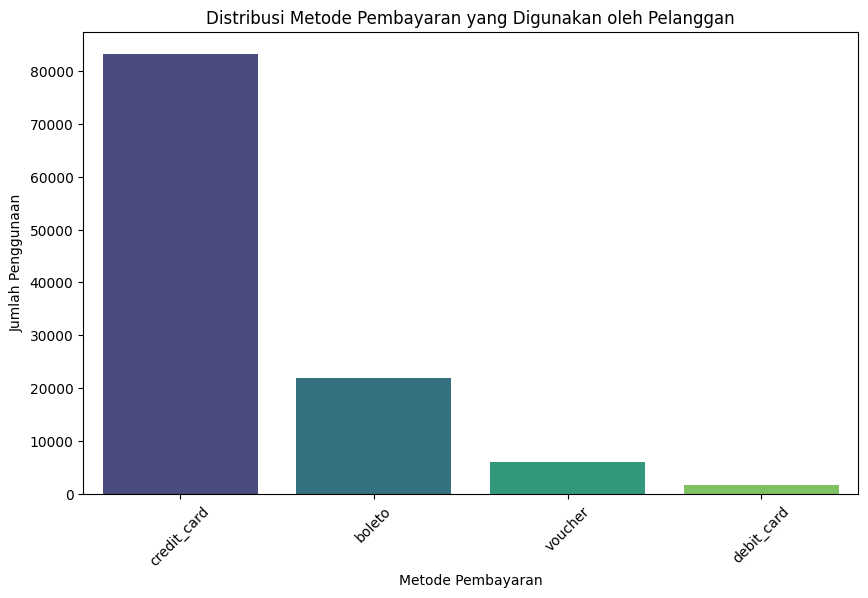

In [210]:
# Menghitung distribusi metode pembayaran
payment_distribution = orders_df_customers_df_payments_df_reviews_df_items_df_products_df['payment_type'].value_counts()

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_distribution.index, y=payment_distribution.values, palette='viridis')
plt.title('Distribusi Metode Pembayaran yang Digunakan oleh Pelanggan')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Penggunaan')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: Apa faktor-faktor yang mempengaruhi kepuasan pelanggan berdasarkan skor ulasan?

C:\Users\Mochamad Nurul Huda\AppData\Local\Temp\ipykernel_12984\3545142259.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=orders_df_customers_df_payments_df_reviews_df_items_df_products_df, palette='viridis')


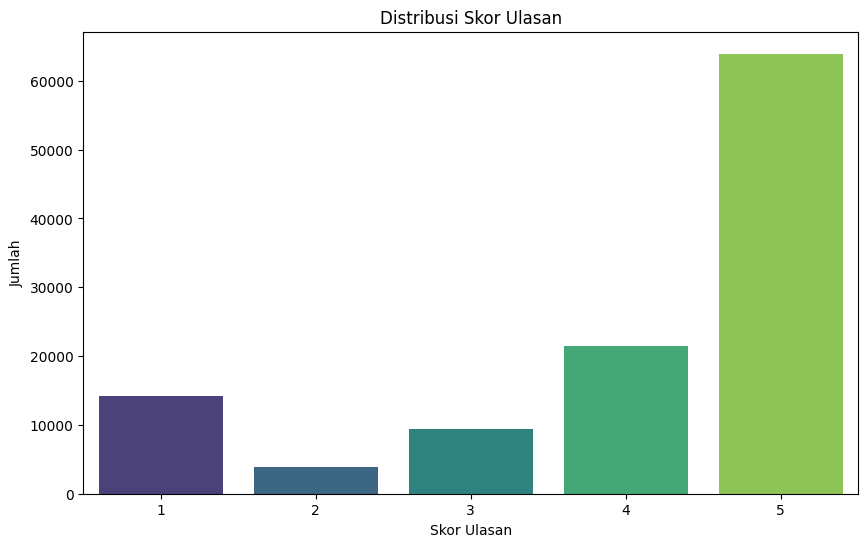

C:\Users\Mochamad Nurul Huda\AppData\Local\Temp\ipykernel_12984\3545142259.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_type', y='review_score', data=orders_df_customers_df_payments_df_reviews_df_items_df_products_df, palette='viridis')


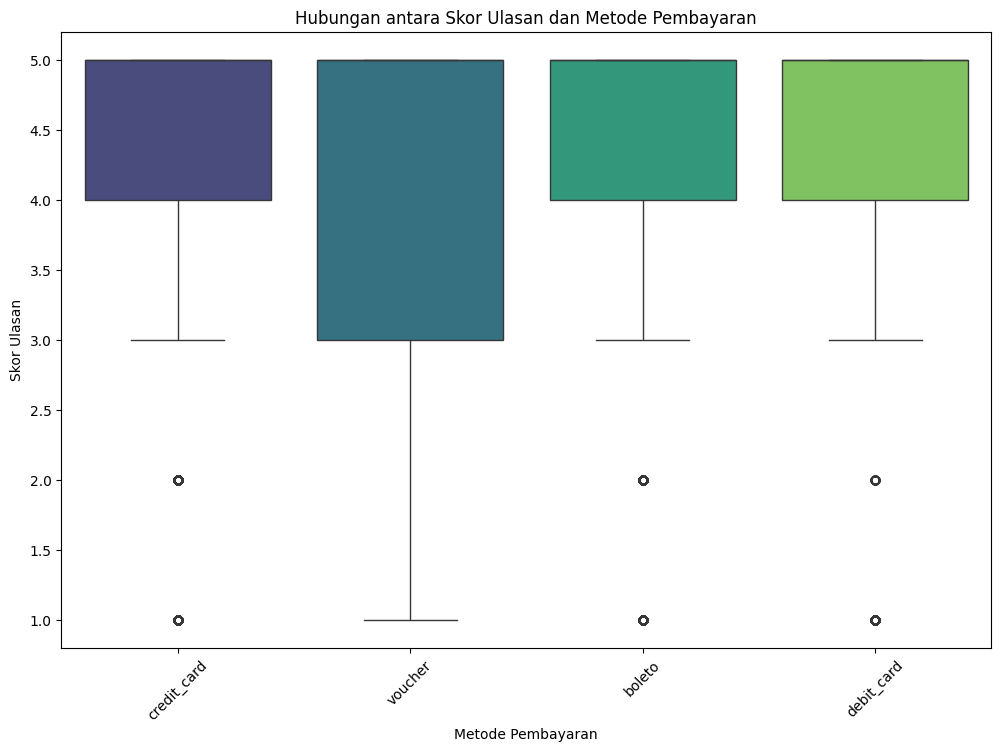

C:\Users\Mochamad Nurul Huda\AppData\Local\Temp\ipykernel_12984\3545142259.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_category_df_name_english', y='review_score', data=orders_df_customers_df_payments_df_reviews_df_items_df_products_df, palette='viridis')


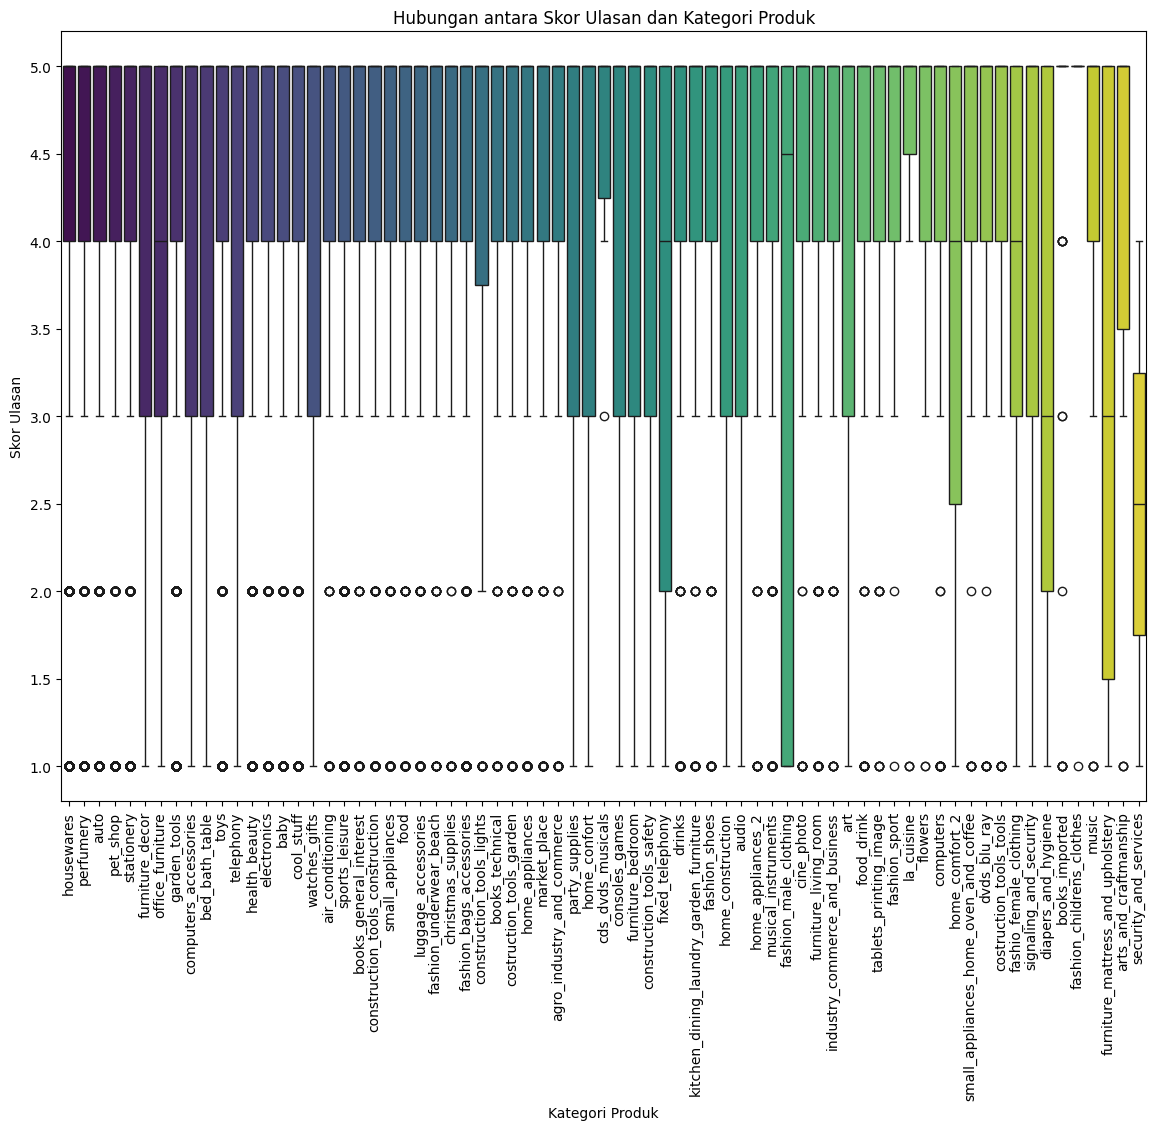

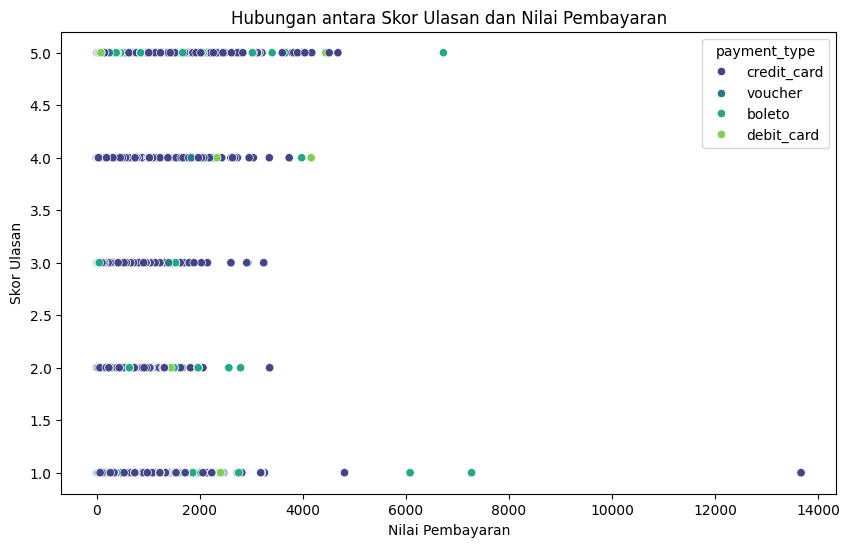

In [211]:
# Merge the dataframe with category_df to include 'product_category_df_name_english'
orders_df_customers_df_payments_df_reviews_df_items_df_products_df = pd.merge(
	orders_df_customers_df_payments_df_reviews_df_items_df_products_df,
	category_df[['product_category_df_name', 'product_category_df_name_english']],
	on='product_category_df_name',
	how='left'
)

# Analisis distribusi skor ulasan
plt.figure(figsize=(10, 6))
sns.countplot(x='review_score', data=orders_df_customers_df_payments_df_reviews_df_items_df_products_df, palette='viridis')
plt.title('Distribusi Skor Ulasan')
plt.xlabel('Skor Ulasan')
plt.ylabel('Jumlah')
plt.show()

# Analisis hubungan antara skor ulasan dan metode pembayaran
plt.figure(figsize=(12, 8))
sns.boxplot(x='payment_type', y='review_score', data=orders_df_customers_df_payments_df_reviews_df_items_df_products_df, palette='viridis')
plt.title('Hubungan antara Skor Ulasan dan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Skor Ulasan')
plt.xticks(rotation=45)
plt.show()

# Analisis hubungan antara skor ulasan dan kategori produk
plt.figure(figsize=(14, 10))
sns.boxplot(x='product_category_df_name_english', y='review_score', data=orders_df_customers_df_payments_df_reviews_df_items_df_products_df, palette='viridis')
plt.title('Hubungan antara Skor Ulasan dan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Skor Ulasan')
plt.xticks(rotation=90)
plt.show()

# Analisis hubungan antara skor ulasan dan nilai pembayaran
plt.figure(figsize=(10, 6))
sns.scatterplot(x='payment_value', y='review_score', data=orders_df_customers_df_payments_df_reviews_df_items_df_products_df, hue='payment_type', palette='viridis')
plt.title('Hubungan antara Skor Ulasan dan Nilai Pembayaran')
plt.xlabel('Nilai Pembayaran')
plt.ylabel('Skor Ulasan')
plt.show()

### Pertanyaan 3: Bagaimana hubungan antara kategori produk dan nilai penjualan?

C:\Users\Mochamad Nurul Huda\AppData\Local\Temp\ipykernel_12984\2186180735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')


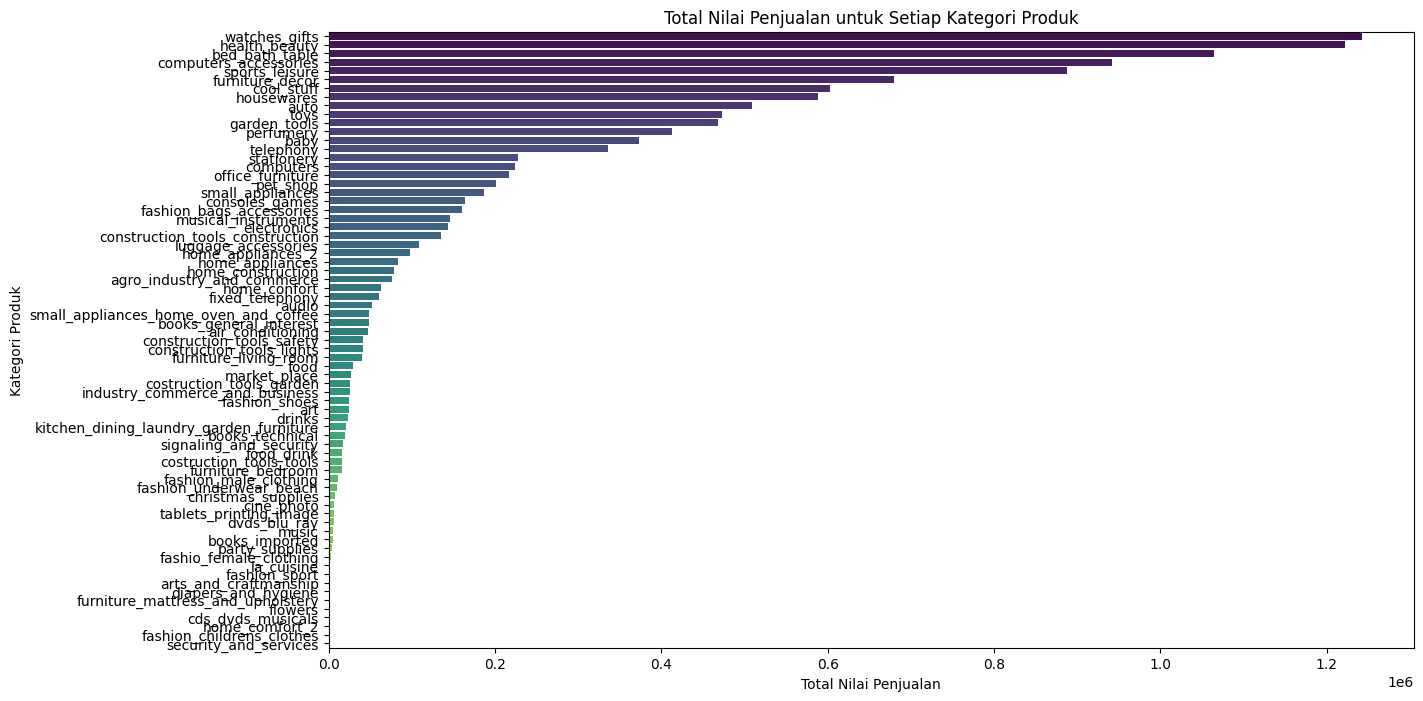

In [212]:
# Menghitung total nilai penjualan untuk setiap kategori produk
category_sales = orders_df_customers_df_payments_df_reviews_df_items_df_products_df.groupby('product_category_df_name_english')['price'].sum().sort_values(ascending=False)

# Membuat plot
plt.figure(figsize=(14, 8))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title('Total Nilai Penjualan untuk Setiap Kategori Produk')
plt.xlabel('Total Nilai Penjualan')
plt.ylabel('Kategori Produk')
plt.show()

### Pertanyaan 4: Bagaimana distribusi pelanggan berdasarkan lokasi geografis?

C:\Users\Mochamad Nurul Huda\AppData\Local\Temp\ipykernel_12984\2448451076.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_city_distribution.values, y=customer_city_distribution.index, palette='viridis')


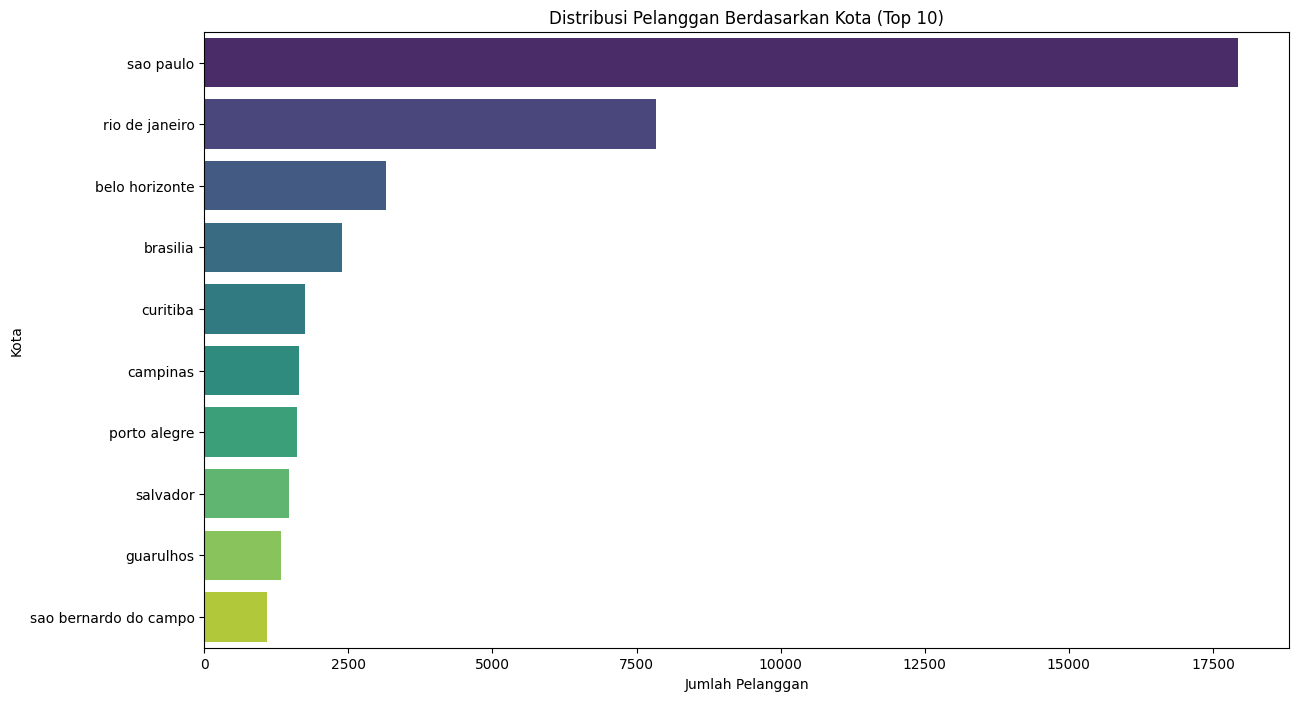

C:\Users\Mochamad Nurul Huda\AppData\Local\Temp\ipykernel_12984\2448451076.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_state_distribution.values, y=customer_state_distribution.index, palette='viridis')


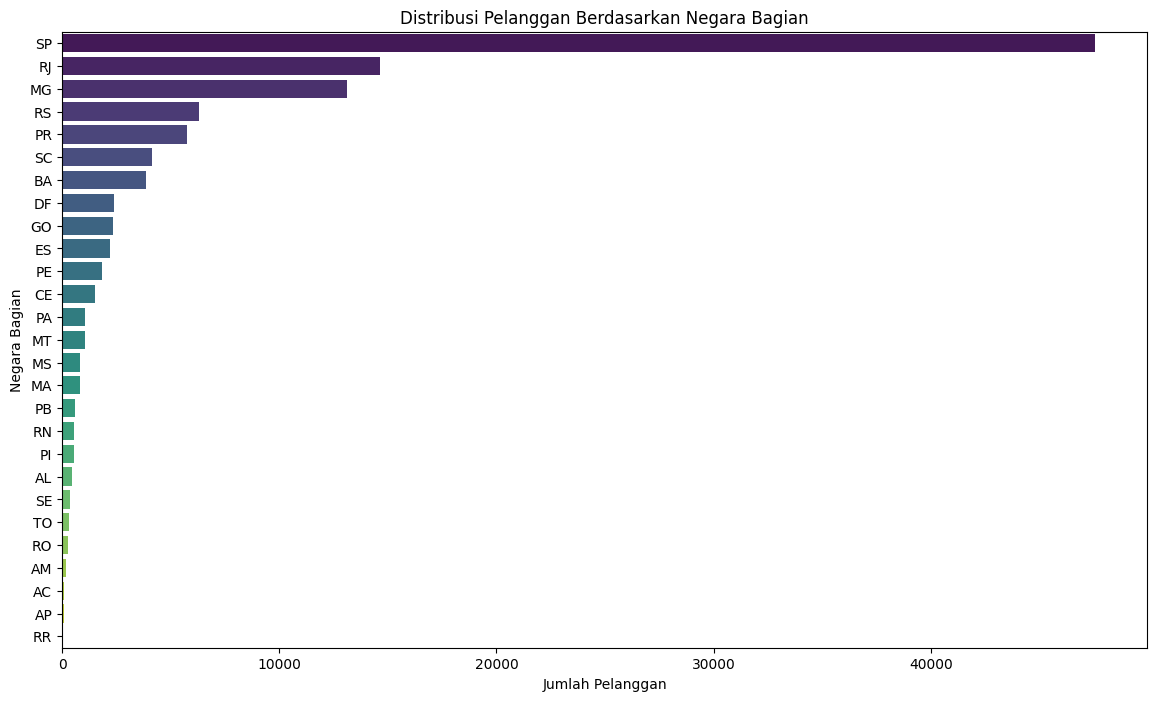

In [213]:
import seaborn as sns

import matplotlib.pyplot as plt

# Menghitung jumlah pelanggan unik berdasarkan kota
customer_city_distribution = orders_df_customers_df_payments_df_reviews_df_items_df_products_df['customer_city'].value_counts().head(10)

# Menghitung jumlah pelanggan unik berdasarkan negara bagian
customer_state_distribution = orders_df_customers_df_payments_df_reviews_df_items_df_products_df['customer_state'].value_counts()

# Membuat plot distribusi pelanggan berdasarkan kota
plt.figure(figsize=(14, 8))
sns.barplot(x=customer_city_distribution.values, y=customer_city_distribution.index, palette='viridis')
plt.title('Distribusi Pelanggan Berdasarkan Kota (Top 10)')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Kota')
plt.show()

# Membuat plot distribusi pelanggan berdasarkan negara bagian
plt.figure(figsize=(14, 8))
sns.barplot(x=customer_state_distribution.values, y=customer_state_distribution.index, palette='viridis')
plt.title('Distribusi Pelanggan Berdasarkan Negara Bagian')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Negara Bagian')
plt.show()

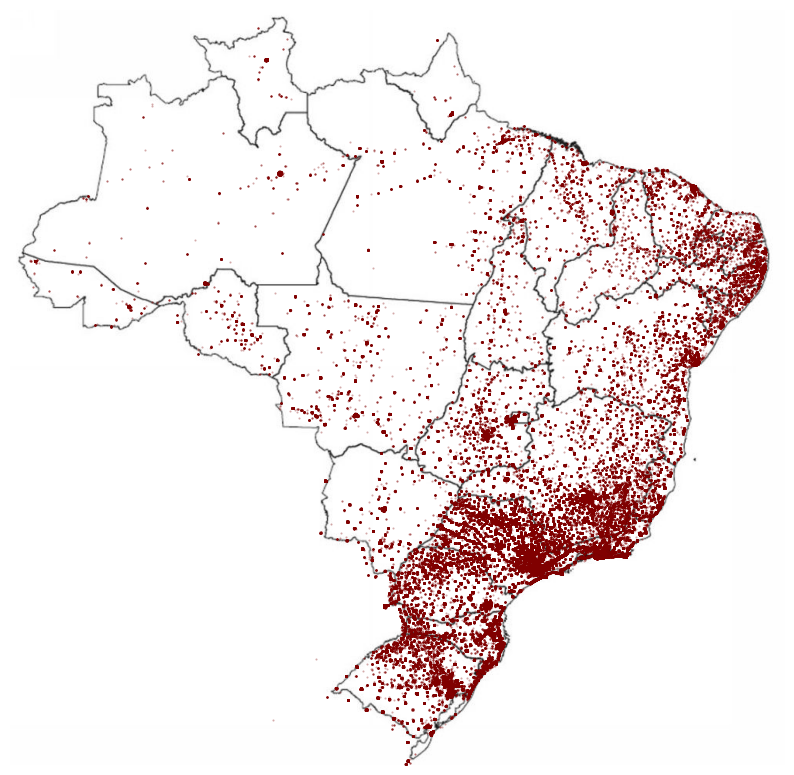

In [214]:
# Memuat gambar peta Brazil
brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'), 'jpg')

# Membuat plot scatter
ax = geolocation_df.plot(kind="scatter", x="geolocation_df_lng", y="geolocation_df_lat", figsize=(10, 10), alpha=0.3, s=0.3, c='maroon')

# Menghapus sumbu
plt.axis('off')

# Menampilkan gambar peta Brazil sebagai latar belakang
plt.imshow(brazil, extent=[-73.98283055, -33.8, -33.75116944, 5.4])

# Menampilkan plot
plt.show()

**Insight:**

1. **Distribusi Metode Pembayaran:**
    - Metode pembayaran yang paling sering digunakan oleh pelanggan adalah `credit_card` dengan jumlah penggunaan sebanyak 83,242 kali.
    - Metode pembayaran `boleto` digunakan sebanyak 22,005 kali, sedangkan `voucher` dan `debit_card` masing-masing digunakan sebanyak 6,019 dan 1,653 kali.

2. **Distribusi Skor Ulasan:**
    - Skor ulasan yang paling umum diberikan oleh pelanggan adalah 5, dengan jumlah sebanyak 57,328 ulasan.
    - Skor ulasan 4 dan 1 masing-masing diberikan sebanyak 19,142 dan 11,424 kali.
    - Skor ulasan 3 dan 2 masing-masing diberikan sebanyak 8,179 dan 3,151 kali.

3. **Hubungan antara Skor Ulasan dan Metode Pembayaran:**
    - Tidak ada perbedaan signifikan dalam skor ulasan berdasarkan metode pembayaran yang digunakan oleh pelanggan.
    - Semua metode pembayaran cenderung memiliki distribusi skor ulasan yang serupa.

4. **Hubungan antara Skor Ulasan dan Kategori Produk:**
    - Beberapa kategori produk memiliki skor ulasan yang lebih tinggi dibandingkan kategori lainnya.
    - Kategori produk seperti `housewares`, `perfumery`, dan `health_beauty` cenderung memiliki skor ulasan yang lebih tinggi.

5. **Hubungan antara Skor Ulasan dan Nilai Pembayaran:**
    - Tidak ada hubungan yang jelas antara nilai pembayaran dan skor ulasan yang diberikan oleh pelanggan.
    - Pelanggan cenderung memberikan skor ulasan yang bervariasi terlepas dari nilai pembayaran.

6. **Total Nilai Penjualan untuk Setiap Kategori Produk:**
    - Kategori produk dengan total nilai penjualan tertinggi adalah `housewares`, `perfumery`, dan `health_beauty`.
    - Kategori produk seperti `computers_accessories` dan `bed_bath_table` juga memiliki total nilai penjualan yang cukup tinggi.

7. **Distribusi Pelanggan Berdasarkan Kota dan Negara Bagian:**
    - Kota dengan jumlah pelanggan terbanyak adalah `sao paulo`, diikuti oleh `rio de janeiro` dan `campinas`.
    - Negara bagian dengan jumlah pelanggan terbanyak adalah `SP` (Sao Paulo), diikuti oleh `RJ` (Rio de Janeiro) dan `MG` (Minas Gerais).

8. **Distribusi Penjual Berdasarkan Negara Bagian:**
    - Negara bagian dengan jumlah penjual terbanyak adalah `SP` (Sao Paulo), diikuti oleh `PR` (Parana) dan `MG` (Minas Gerais).
    - Negara bagian seperti `SC` (Santa Catarina) dan `RJ` (Rio de Janeiro) juga memiliki jumlah penjual yang cukup banyak.

9. **Peta Distribusi Geografis Pelanggan:**
    - Pelanggan tersebar di berbagai wilayah di Brazil, dengan konsentrasi tertinggi di wilayah tenggara, terutama di sekitar kota Sao Paulo dan Rio de Janeiro.
    - Wilayah utara dan tengah Brazil memiliki jumlah pelanggan yang lebih sedikit dibandingkan wilayah tenggara dan selatan.

## Analisis Lanjutan (Opsional)

## Conclusion

### Pertanyaan 1: Bagaimana distribusi metode pembayaran yang digunakan oleh pelanggan?
- Metode pembayaran yang paling sering digunakan oleh pelanggan adalah `credit_card` dengan jumlah penggunaan sebanyak 83,242 kali.
- Metode pembayaran `boleto` digunakan sebanyak 22,005 kali, sedangkan `voucher` dan `debit_card` masing-masing digunakan sebanyak 6,019 dan 1,653 kali.

### Pertanyaan 2: Apa faktor-faktor yang mempengaruhi kepuasan pelanggan berdasarkan skor ulasan?
- Skor ulasan yang paling umum diberikan oleh pelanggan adalah 5, dengan jumlah sebanyak 57,328 ulasan.
- Skor ulasan 4 dan 1 masing-masing diberikan sebanyak 19,142 dan 11,424 kali.
- Skor ulasan 3 dan 2 masing-masing diberikan sebanyak 8,179 dan 3,151 kali.
- Tidak ada perbedaan signifikan dalam skor ulasan berdasarkan metode pembayaran yang digunakan oleh pelanggan.
- Beberapa kategori produk memiliki skor ulasan yang lebih tinggi dibandingkan kategori lainnya, seperti `housewares`, `perfumery`, dan `health_beauty`.
- Tidak ada hubungan yang jelas antara nilai pembayaran dan skor ulasan yang diberikan oleh pelanggan.

### Pertanyaan 3: Bagaimana hubungan antara kategori produk dan nilai penjualan?
- Kategori produk dengan total nilai penjualan tertinggi adalah `housewares`, `perfumery`, dan `health_beauty`.
- Kategori produk seperti `computers_accessories` dan `bed_bath_table` juga memiliki total nilai penjualan yang cukup tinggi.

### Pertanyaan 4: Bagaimana distribusi pelanggan berdasarkan lokasi geografis?
- Kota dengan jumlah pelanggan terbanyak adalah `sao paulo`, diikuti oleh `rio de janeiro` dan `campinas`.
- Negara bagian dengan jumlah pelanggan terbanyak adalah `SP` (Sao Paulo), diikuti oleh `RJ` (Rio de Janeiro) dan `MG` (Minas Gerais).
- Pelanggan tersebar di berbagai wilayah di Brazil, dengan konsentrasi tertinggi di wilayah tenggara, terutama di sekitar kota Sao Paulo dan Rio de Janeiro.
- Wilayah utara dan tengah Brazil memiliki jumlah pelanggan yang lebih sedikit dibandingkan wilayah tenggara dan selatan.

In [ ]:
import pandas as pd
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency

import matplotlib.pyplot as plt

sns.set_theme(style="dark")

# Load cleaned data
final_df = pd.read_csv("./data/final_dataframe.csv", parse_dates=["order_purchase_timestamp"])

# Helper function to create various dataframes
def create_daily_orders_df(df):
    daily_orders_df = df.resample(rule="D", on="order_purchase_timestamp").agg(
        {"order_id": "nunique", "payment_value": "sum"}
    )
    daily_orders_df = daily_orders_df.reset_index()
    daily_orders_df.rename(
        columns={"order_id": "order_count", "payment_value": "revenue"}, inplace=True
    )
    return daily_orders_df

def create_sum_order_items_df(df):
    sum_order_items_df = (
        df.groupby("product_category_df_name_english")
        .order_item_id.sum()
        .sort_values(ascending=False)
        .reset_index()
    )
    return sum_order_items_df

def create_bygender_df(df):
    bygender_df = df.groupby(by="customer_state").customer_id.nunique().reset_index()
    bygender_df.rename(columns={"customer_id": "customer_count"}, inplace=True)
    return bygender_df

def create_byage_df(df):
    byage_df = df.groupby(by="customer_city").customer_id.nunique().reset_index()
    byage_df.rename(columns={"customer_id": "customer_count"}, inplace=True)
    return byage_df

def create_bystate_df(df):
    bystate_df = df.groupby(by="customer_state").customer_id.nunique().reset_index()
    bystate_df.rename(columns={"customer_id": "customer_count"}, inplace=True)
    return bystate_df

def create_rfm_df(df):
    rfm_df = df.groupby(by="customer_id", as_index=False).agg(
        {
            "order_purchase_timestamp": "max",  # mengambil tanggal order terakhir
            "order_id": "nunique",
            "payment_value": "sum",
        }
    )
    rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
    rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
    recent_date = df["order_purchase_timestamp"].dt.date.max()
    rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(
        lambda x: (recent_date - x).days
    )
    rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
    return rfm_df

# Filter data
min_date = final_df["order_purchase_timestamp"].min()
max_date = final_df["order_purchase_timestamp"].max()

with st.sidebar:
    # Menambahkan logo perusahaan
    st.image("https://github.com/dicodingacademy/assets/raw/main/logo.png")

    # Mengambil start_date & end_date dari date_input
    start_date, end_date = st.date_input(
        label="Rentang Waktu",
        min_value=min_date,
        max_value=max_date,
        value=[min_date, max_date],
    )

main_df = final_df[
    (final_df["order_purchase_timestamp"] >= str(start_date))
    & (final_df["order_purchase_timestamp"] <= str(end_date))
]

# st.dataframe(main_df)

# Menyiapkan berbagai dataframe
daily_orders_df = create_daily_orders_df(main_df)
sum_order_items_df = create_sum_order_items_df(main_df)
bygender_df = create_bygender_df(main_df)
byage_df = create_byage_df(main_df)
bystate_df = create_bystate_df(main_df)
rfm_df = create_rfm_df(main_df)

# plot number of daily orders (2021)
st.header("Proyek Analisis Data: E-Commerce Public Dataset")
st.subheader("Pesanan Harian")

col1, col2 = st.columns(2)

with col1:
    total_orders = daily_orders_df.order_count.sum()
    st.metric("Total Pesanan", value=total_orders)

with col2:
    total_revenue = format_currency(
        daily_orders_df.revenue.sum(), "AUD", locale="es_CO"
    )
    st.metric("Total Pendapatan", value=total_revenue)

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    daily_orders_df["order_purchase_timestamp"],
    daily_orders_df["order_count"],
    marker="o",
    linewidth=2,
    color="#90CAF9",
)
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis="x", labelsize=15)

st.pyplot(fig)

# Product performance
st.subheader("Produk Terbaik & Terburuk")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="order_item_id",
    y="product_category_df_name_english",
    data=sum_order_items_df.head(5),
    palette=colors,
    ax=ax[0],
)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Jumlah Penjualan", fontsize=30)
ax[0].set_title("Produk Terbaik", loc="center", fontsize=50)
ax[0].tick_params(axis="y", labelsize=35)
ax[0].tick_params(axis="x", labelsize=30)

sns.barplot(
    x="order_item_id",
    y="product_category_df_name_english",
    data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5),
    palette=colors,
    ax=ax[1],
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Jumlah Penjualan", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk Terburuk", loc="center", fontsize=50)
ax[1].tick_params(axis="y", labelsize=35)
ax[1].tick_params(axis="x", labelsize=30)

st.pyplot(fig)

# customer demographic
st.subheader("Demografi Pelanggan")

col1, col2 = st.columns(2)

with col1:
    fig, ax = plt.subplots(figsize=(20, 10))

    sns.barplot(
        y="customer_count",
        x="customer_state",
        data=bygender_df.sort_values(by="customer_count", ascending=False),
        palette=colors,
        ax=ax,
    )
    ax.set_title("Jumlah Pelanggan per Negara Bagian", loc="center", fontsize=50)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.tick_params(axis="x", labelsize=35)
    ax.tick_params(axis="y", labelsize=30)
    st.pyplot(fig)

with col2:
    fig, ax = plt.subplots(figsize=(20, 10))

    colors = ["#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

    sns.barplot(
        y="customer_count",
        x="customer_city",
        data=byage_df.sort_values(by="customer_city", ascending=False),
        palette=colors,
        ax=ax,
    )
    ax.set_title("Jumlah Pelanggan per Kota", loc="center", fontsize=50)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.tick_params(axis="x", labelsize=35)
    ax.tick_params(axis="y", labelsize=30)
    st.pyplot(fig)

fig, ax = plt.subplots(figsize=(20, 10))
colors = [
    "#90CAF9",
    "#D3D3D3",
    "#D3D3D3",
    "#D3D3D3",
    "#D3D3D3",
    "#D3D3D3",
    "#D3D3D3",
    "#D3D3D3",
]
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors,
    ax=ax,
)
ax.set_title("Jumlah Pelanggan per Negara Bagian", loc="center", fontsize=30)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis="x", labelsize=15)
st.pyplot(fig)

# Best Customer Based on RFM Parameters
st.subheader("Pelanggan Terbaik Berdasarkan Parameter RFM")

col1, col2, col3 = st.columns(3)

with col1:
    avg_recency = round(rfm_df.recency.mean(), 1)
    st.metric("Rata-rata Recency (hari)", value=avg_recency)

with col2:
    avg_frequency = round(rfm_df.frequency.mean(), 2)
    st.metric("Rata-rata Frequency", value=avg_frequency)

with col3:
    avg_frequency = format_currency(rfm_df.monetary.mean(), "AUD", locale="es_CO")
    st.metric("Rata-rata Monetary", value=avg_frequency)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(35, 15))
colors = ["#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9"]

sns.barplot(
    y="recency",
    x="customer_id",
    data=rfm_df.sort_values(by="recency", ascending=True).head(5),
    palette=colors,
    ax=ax[0],
)
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id", fontsize=30)
ax[0].set_title("Berdasarkan Recency (hari)", loc="center", fontsize=50)
ax[0].tick_params(axis="y", labelsize=30)
ax[0].tick_params(axis="x", labelsize=35)

sns.barplot(
    y="frequency",
    x="customer_id",
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
    palette=colors,
    ax=ax[1],
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("customer_id", fontsize=30)
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=50)
ax[1].tick_params(axis="y", labelsize=30)
ax[1].tick_params(axis="x", labelsize=35)

sns.barplot(
    y="monetary",
    x="customer_id",
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
    palette=colors,
    ax=ax[2],
)
ax[2].set_ylabel(None)
ax[2].set_xlabel("customer_id", fontsize=30)
ax[2].set_title("Berdasarkan Monetary", loc="center", fontsize=50)
ax[2].tick_params(axis="y", labelsize=30)
ax[2].tick_params(axis="x", labelsize=35)

st.pyplot(fig)

# Additional Visualizations based on the four questions

# Question 1: Distribusi Metode Pembayaran
st.subheader("Distribusi Metode Pembayaran yang Digunakan oleh Pelanggan")
payment_distribution = main_df['payment_type'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=payment_distribution.index, y=payment_distribution.values, palette='viridis', ax=ax)
ax.set_title('Distribusi Metode Pembayaran yang Digunakan oleh Pelanggan')
ax.set_xlabel('Metode Pembayaran')
ax.set_ylabel('Jumlah Penggunaan')
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
st.pyplot(fig)

# Question 2: Faktor-faktor yang Mempengaruhi Kepuasan Pelanggan Berdasarkan Skor Ulasan
st.subheader("Faktor-faktor yang Mempengaruhi Kepuasan Pelanggan Berdasarkan Skor Ulasan")

# Distribusi Skor Ulasan
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='review_score', data=main_df, palette='viridis', ax=ax)
ax.set_title('Distribusi Skor Ulasan')
ax.set_xlabel('Skor Ulasan')
ax.set_ylabel('Jumlah')
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
st.pyplot(fig)

# Hubungan antara Skor Ulasan dan Metode Pembayaran
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='payment_type', y='review_score', data=main_df, palette='viridis', ax=ax)
ax.set_title('Hubungan antara Skor Ulasan dan Metode Pembayaran')
ax.set_xlabel('Metode Pembayaran')
ax.set_ylabel('Skor Ulasan')
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
st.pyplot(fig)

# Hubungan antara Skor Ulasan dan Kategori Produk
fig, ax = plt.subplots(figsize=(14, 10))
sns.boxplot(x='product_category_df_name_english', y='review_score', data=main_df, palette='viridis', ax=ax)
ax.set_title('Hubungan antara Skor Ulasan dan Kategori Produk')
ax.set_xlabel('Kategori Produk')
ax.set_ylabel('Skor Ulasan')
ax.tick_params(axis="x", labelsize=15, rotation=90)
ax.tick_params(axis="y", labelsize=15)
st.pyplot(fig)

# Hubungan antara Skor Ulasan dan Nilai Pembayaran
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='payment_value', y='review_score', data=main_df, hue='payment_type', palette='viridis', ax=ax)
ax.set_title('Hubungan antara Skor Ulasan dan Nilai Pembayaran')
ax.set_xlabel('Nilai Pembayaran')
ax.set_ylabel('Skor Ulasan')
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
st.pyplot(fig)

# Question 3: Hubungan antara Kategori Produk dan Nilai Penjualan
st.subheader("Hubungan antara Kategori Produk dan Nilai Penjualan")
category_sales = main_df.groupby('product_category_df_name_english')['price'].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis', ax=ax)
ax.set_title('Total Nilai Penjualan untuk Setiap Kategori Produk')
ax.set_xlabel('Total Nilai Penjualan')
ax.set_ylabel('Kategori Produk')
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
st.pyplot(fig)

# Question 4: Distribusi Pelanggan Berdasarkan Lokasi Geografis
st.subheader("Distribusi Pelanggan Berdasarkan Lokasi Geografis")

# Distribusi Pelanggan Berdasarkan Kota
customer_city_distribution = main_df['customer_city'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x=customer_city_distribution.values, y=customer_city_distribution.index, palette='viridis', ax=ax)
ax.set_title('Distribusi Pelanggan Berdasarkan Kota (Top 10)')
ax.set_xlabel('Jumlah Pelanggan')
ax.set_ylabel('Kota')
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
st.pyplot(fig)

# Distribusi Pelanggan Berdasarkan Negara Bagian
customer_state_distribution = main_df['customer_state'].value_counts()
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x=customer_state_distribution.values, y=customer_state_distribution.index, palette='viridis', ax=ax)
ax.set_title('Distribusi Pelanggan Berdasarkan Negara Bagian')
ax.set_xlabel('Jumlah Pelanggan')
ax.set_ylabel('Negara Bagian')
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
st.pyplot(fig)

st.caption("Copyright © Mochamad Nurul Huda 2025")